In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337) 
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


In [3]:
import matplotlib.pyplot as plt

In [2]:

traindata = pd.read_csv('/DATA/Training.csv', header=None)
testdata = pd.read_csv('/DATA/Testing.csv', header=None)


X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train = np.array(Y)
y_test = np.array(C)

X_train = np.array(trainX)
X_test = np.array(testT)

In [7]:
batch_size = 64

model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              43008     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 768)               787200    
                                                                 
 dropout_1 (Dropout)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               393728    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

In [10]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('kddresults/training_set_dnnanalysis.csv',separator=',', append=False)
model.fit(X_train, y_train, batch_size=batch_size, epochs=20, callbacks=[checkpointer,csv_logger])
model.save("kddresults/dnn5layer_model.hdf5")



Epoch 1/20
7712/7720 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9990
Epoch 1: loss improved from inf to 0.00413, saving model to kddresults/dnn5layer/checkpoint-01.hdf5
7720/7720 [==============================] - 35s 4ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 2/20
7715/7720 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9990
Epoch 2: loss improved from 0.00413 to 0.00363, saving model to kddresults/dnn5layer/checkpoint-02.hdf5
7720/7720 [==============================] - 37s 5ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 3/20
7708/7720 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991
Epoch 3: loss improved from 0.00363 to 0.00304, saving model to kddresults/dnn5layer/checkpoint-03.hdf5
7720/7720 [==============================] - 36s 5ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 4/20
7720/7720 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9991
Epoch 4: loss did not im

In [11]:
from sklearn.metrics import confusion_matrix
y_train1 = y_test
y_pred = model.predict(X_test)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_train1 ,np.round(abs(y_pred)))

print(cf_matrix)

[[ 60236    357]
 [ 21861 228575]]


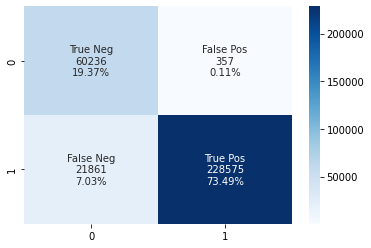

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

In [13]:
score = []
name = []
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

import os

model.load_weights("kddresults/dnn5layer_model.hdf5")
y_train1 = y_test
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_train1,  np.round(abs(y_pred)))
recall = recall_score(y_train1, np.round(abs(y_pred)) , average="binary")
precision = precision_score(y_train1,np.round(abs(y_pred)) , average="binary")
f1 = f1_score(y_train1, np.round(abs(y_pred)) , average="binary")
print("accuracy")
print("%.3f" %accuracy)
print("recall")
print("%.3f" %recall)
print("precision")
print("%.3f" %precision)
print("f1score")
print("%.3f" %f1)










----------------------------------------------
accuracy
0.929
recall
0.913
precision
0.998
f1score
0.954
